# Quiz 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
h11 = pd.read_csv("homework_1.1.csv").drop(columns=["Unnamed: 0"])
h12 = pd.read_csv("homework_1.2.csv").drop(columns=["Unnamed: 0"])

For questions 1 to 3:

Perform a linear regression to predict Y from X1, X2, and X3. Use the file homework_1.1.csv.

In [3]:
h11

,X1,X2,X3,Y
0,-0.440646,-0.390227,0.156718,-0.877671
1,-3.810099,-1.304665,-1.105117,-10.130388
2,-1.425451,-0.340049,1.115908,0.284068
3,-1.325750,0.161906,-0.254670,-1.994344
4,3.120263,1.487343,-1.164839,2.030030
...,...,...,...,...
995,1.281625,-0.062024,-0.109231,1.206058
996,-3.047558,-1.121675,0.678439,-3.229262
997,-0.028757,-0.191722,1.191790,3.160897
998,0.415266,0.373086,1.172636,4.033302


Question 1
Which of the following is closest to the coefficient of X1? 

In [4]:
results = sm.OLS(h11.Y, sm.add_constant(h11[["X1", "X2", "X3"]])).fit()
results.params

const    0.002643
X1       1.007138
X2       1.964569
X3       2.975489
dtype: float64

Question 2
Which Xi has the greatest difference between the amount Y increases for each 1 unit of Xi (fixing the other Xi’s), as opposed to the amount that Y increases for each 1 unit of Xi in the dataset, on average (not fixing the other Xis)? Hint: for the former, you'll have to regress Y on Xi alone, while for the latter, you'll have to regress Y on all three Xis. 

In [5]:
results = sm.OLS(h11.Y, sm.add_constant(h11[["X1"]])).fit()
results.params

const    0.194478
X1       1.841761
dtype: float64

In [6]:
results = sm.OLS(h11.Y, sm.add_constant(h11[["X2"]])).fit()
results.params

const    0.155867
X2       4.083613
dtype: float64

In [7]:
results = sm.OLS(h11.Y, sm.add_constant(h11[["X3"]])).fit()
results.params

const    0.100479
X3       3.097041
dtype: float64

In [8]:
results = sm.OLS(h11.Y, sm.add_constant(h11[["X1", "X2", "X3"]])).fit()
results.params

const    0.002643
X1       1.007138
X2       1.964569
X3       2.975489
dtype: float64

Question 3
When regressing Y on all Xis together, which coefficient is most significant, considering the t-statistic as a measure of significance? 

In [9]:
results.tvalues

const      0.166181
X1        60.984011
X2        53.283212
X3       196.645240
dtype: float64

For Question 4 and 5:


Use NearestNeighbors to match data based on variables Z, given the file homework_1.2.csv.
Pick the best match in X = 0 corresponding to each X = 1. Use the Z values to perform the match: a good match with X = 1 is the item whose Z value is closest to the given sample's Z value with X = 0. I suggest using sklearn's NearestNeighbors to do this, but there are many ways to do it.  

In [10]:
h12

,X,Y,Z
0,0,0.548814,0.548814
1,1,1.215189,0.715189
2,0,0.602763,0.602763
3,0,0.544883,0.544883
4,0,0.423655,0.423655
...,...,...,...
95,0,0.183191,0.183191
96,1,1.086513,0.586513
97,0,0.020108,0.020108
98,1,1.328940,0.828940


Question 4
What is the distance of the farthest match in this set?

In [11]:
treated = h12[h12["X"] == 1]
control = h12[h12["X"] == 0]
model = NearestNeighbors(n_neighbors = 1)
result = model.fit(control[["Z"]])

In [12]:
prediction = result.kneighbors(treated[["Z"]])

In [13]:
prediction[0].max()

np.float64(0.2102170871093757)

Question 5
What is the effect? (The difference between the average Y value for X = 0 values vs. the average Y value for X = 1, where the X = 0 sample has the best match for each X = 1 value). So we use the matched sample of X = 0 and the full sample of X = 1.

In [14]:
matched_controls = control.iloc[prediction[1].flatten()]
treated.Y.mean() - matched_controls.Y.mean()

np.float64(0.5433600651913855)

For questions 6 and 7:

Use NearestNeighbors to match data based on variables Z, given the file homework_1.2.csv. 
Try approach B: Pick all of the matches in X = 0 that are within a distance 0.2 of each X = 1. Duplicates are okay, in case a given sample with X = 0 is a good match for multiple items with X = 1. 

Question 6
How many duplicates do you end up with? (Count all but the first duplicate in each group. One way to do this is to use radius_neighbors.)

In [15]:
treated = h12[h12["X"] == 1]
control = h12[h12["X"] == 0]
model = NearestNeighbors(n_neighbors = 1, radius = 0.2)
result = model.fit(control[["Z"]])
prediction = result.radius_neighbors(treated[["Z"]])
prediction[1]

array([array([ 0,  1,  2,  4,  5,  9, 12, 17, 20, 21, 25, 31, 35, 41, 43, 45, 48]),
       array([ 0,  1,  2,  4,  5,  9, 12, 15, 17, 20, 21, 25, 27, 31, 34, 35, 41,
              43, 45, 48])                                                       ,
       array([ 0,  1,  2,  3,  4,  5, 12, 13, 14, 15, 17, 18, 26, 27, 28, 34, 37,
              39, 41, 42, 43, 45, 46])                                           ,
       array([ 9, 35, 48]), array([9]),
       array([ 0,  2,  3,  4,  5, 12, 13, 14, 15, 18, 22, 24, 26, 27, 28, 34, 37,
              39, 41, 42, 43, 45, 46])                                           ,
       array([ 1,  9, 17, 20, 21, 25, 31, 35, 48]), array([ 9, 35]),
       array([ 9, 20, 21, 25, 31, 35, 48]), array([ 9, 21, 35, 48]),
       array([], dtype=int64),
       array([ 1,  9, 17, 20, 21, 25, 31, 35, 48]),
       array([ 0,  1,  2,  3,  4,  5, 12, 13, 14, 15, 17, 18, 25, 27, 31, 34, 37,
              39, 41, 42, 43, 45, 46])                                        

In [16]:
(pd.Series([y for x in prediction[1] for y in x]).value_counts() - 1).sum()

np.int64(685)

Question 7
What is the effect? (Note: to compute the effect, you should take the mean of the Y values in each neighbor group, then average the Y for each group.)

In [17]:
distances, indices = prediction

# Compute Y_treated - mean(Y_control_neighbors) for each treated row
diffs = []
used = 0
skipped = 0
y_treated = treated["Y"].to_numpy()

for i, idx_list in enumerate(indices):
    if len(idx_list) == 0:
        skipped += 1
        continue
    y_ctrl_mean = control["Y"].iloc[idx_list].mean()
    diffs.append(y_treated[i] - y_ctrl_mean)
    used += 1

effect = float(np.mean(diffs)) if len(diffs) > 0 else float("nan")

print("Effect (radius 0.2 on Z):", effect)
print("Treated used:", used)
print("Treated with no neighbors within 0.2:", skipped)


Effect (radius 0.2 on Z): 0.5688516533881482
Treated used: 46
Treated with no neighbors within 0.2: 2


Reflection Code

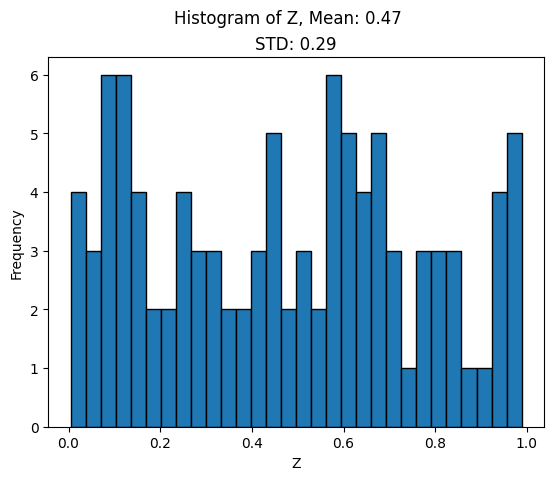

In [18]:
h12["Z"].hist(bins=30, grid=False, edgecolor='black')
plt.xlabel("Z")
plt.ylabel("Frequency")
plt.suptitle("Histogram of Z, Mean: %.2f" % h12["Z"].mean())
plt.title("STD: %.2f" % h12["Z"].std())
plt.show()

In [19]:
h12["Z"].mean()

np.float64(0.4727938395125177)

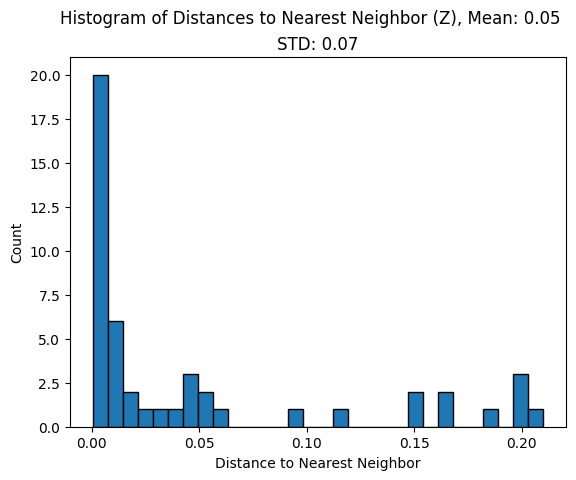

In [20]:
treated = h12[h12["X"] == 1]
control = h12[h12["X"] == 0]
model = NearestNeighbors(n_neighbors = 1)
result = model.fit(control[["Z"]])
prediction = result.kneighbors(treated[["Z"]])
distances, indices = prediction

plt.hist(distances.flatten(), bins=30, edgecolor='black')
plt.xlabel("Distance to Nearest Neighbor")
plt.ylabel("Count")
plt.suptitle("Histogram of Distances to Nearest Neighbor (Z), Mean: %.2f" % distances.mean())
plt.title("STD: %.2f" % distances.std())
plt.show()


In [21]:
np.percentile(distances, 95)

np.float64(0.19849876912855724)

In [22]:
# Split the data into treated (X=1) and control (X=0)
treated = h12[h12["X"] == 1].reset_index(drop=True)
control = h12[h12["X"] == 0].reset_index(drop=True)

# Pull out the control group's Z and Y as arrays for easier math
control_Z = control["Z"].to_numpy()
control_Y = control["Y"].to_numpy()

# Store the effect for each treated unit
effects = []

# Loop through each treated row
for i in range(len(treated)):
    # Get this treated unit's Z and Y
    z_treated = treated.loc[i, "Z"]
    y_treated = treated.loc[i, "Y"]

    # Calculate distances in Z between this treated unit and all control units
    distances = np.abs(control_Z - z_treated)
    max_distance = distances.max()

    # Turn distances into weights
    # Exact match (distance = 0) weight = 1
    # Farthest control (distance = max_distance) weight = 0
    # Everyone else somewhere in between (linear scale)
    if max_distance == 0:
        weights = np.ones_like(distances, dtype=float)
    else:
        weights = 1.0 - (distances / max_distance)
        weights = np.clip(weights, 0.0, 1.0)

    # Weighted average outcome (Y) from the control group
    y_control_weighted = float((weights * control_Y).sum() / weights.sum())

    # Effect for this treated unit = treated Y minus weighted control Y
    effect = y_treated - y_control_weighted
    effects.append(effect)

# Average treatment effect across all treated units
average_effect = float(np.mean(effects))

print("Weighted matching effect (ATE):", round(average_effect, 6))


Weighted matching effect (ATE): 0.690615
